<a href="https://colab.research.google.com/github/doritos0812/Software_LAB_Class/blob/main/2015104013_%EA%B9%80%ED%98%95%EB%AF%BC_Final_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final exam

__<div style="text-align: right"> EE370: Software lab, Kyung Hee University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@khu.ac.kr) </div>_

This exam contains one open question. _Your answers should be turned in to the instructor and the course assistant no later than 5:20pm on June 24th, and you are not allowed to discuss the exam with anyone until then._ The only exception is when you email the instructor for clarification.

Your answers should be as concise as possible while self-explaining that the presented results are reasonable. **_Poorly presented answers or list of graphs without any explanation, for which the graders have to closely examine or even run the code to check the correctness, will get no credit._** We suggest you spend at least an hour in carefully writing down concise explanations on your results.

Write your student ID and name below. **_Typing your name implies that you acknowledge and accept the Kyung Hee University Honor Code._**

<br>

- STUDENT ID: 2015104013

- STUDENT NAME: 김형민

<br>

_Kyung Hee University Honor Code:_

1. The honor code is a commitment of students, individually and collectively, that they will not provide or receive any impermissible aid in examinations as well as other activities used as the basis of grading, and that they will do their best for the sake of the integrity of the community.
2. The faculty also assumes obligations to provide students with the environment in which students can best practice the honor code, and does its part in building the academic integrity of the community.

<br>

---
## Spread of COVID-19

Running the following cell loads countrywise daily records of the confirmed, recovered, and death cases of COVID-19 disease. 

Use whatever techniques that we have discussed in class to explore, analyze, discover, and present some meaningful results from these dataset. 

You might be interested in comparing the effectiveness of the disease control policies of different countries, or might want to make some predictions on future spread of this deadly disease; these were just examples and you choose what you want to do. Good answers should contain some graphical presentaions with rich explanations supporting your logic, analysis, and conclusion.


In [ ]:
import pandas as pd
confirmed = pd.read_csv('https://jonghank.github.io/ee370/files/ee370-confirmed.csv')
recovered = pd.read_csv('https://jonghank.github.io/ee370/files/ee370-recovered.csv')
deaths    = pd.read_csv('https://jonghank.github.io/ee370/files/ee370-deaths.csv')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
confirmed.shape

(266, 155)

In [ ]:
confirmed.head(10) #개략적인 Preview

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,876,880,898,916,933,946,948,949,964,969,981,989,998,1004,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,6067,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697,8857,8997,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,758,760,761,761,761,761,761,761,762,762,762,762,762,763,763,763,763,764,764,764,765,844,851,852,852,852,852,852,852,852,852,853,853,853,853,854,854,855,855,855
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,45,45,48,48,48,48,50,52,52,58,60,61,69,70,70,71,74,81,84,86,86,86,86,86,86,88,91,92,96,113,118,130,138,140,142,148,155,166,172,176
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6563,6879,7134,7479,7805,8068,8371,8809,9283,9931,10649,11353,12076,12628,13228,13933,14702,15419,16214,16851,17415,18319,19268,20197,21037,22020,22794,23620,24761,25987,27373,28764,30295,31577,32785,34159,35552,37510,39570,41204
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3538,3718,3860,4044,4283,4472,4823,5041,5271,5606,5928,6302,6661,7113,7402,7774,8216,8676,8927,9282,9492,10009,10524,11221,11817,12364,13130,13325,13675,14103,14669,15281,16004,16667,17064,17489,18033,18698,19157,19708
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,...,3059,3063,3071,3074,3075,3076,3078,3081,3082,3084,3086,3087,3090,3092,3089,3090,3092,3092,3095,3098,3104,3104,3106,3110,3110,3109,3112,3114,3117,3117,3115,3119,3128,3131,3134,3135,3137,3143,3144,3149


In [ ]:
recovered.head(10) #개략적인 Preview

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,610,648,691,745,745,778,801,850,930,938,996,1040,1075,1097,1128,1138,1209,1259,1303,1328,1428,1450,1522,1585,1762,1830,1875,2171,2651,3013,3326,3928,4201,4725,5164,5508,6158,7660,7962,8292
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,682,688,694,705,714,715,727,742,758,771,777,783,789,795,803,812,823,851,857,872,877,891,898,898,910,925,938,945,960,980,1001,1034,1039,1044,1055,1064,1077,1086,1114,1126
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2998,3058,3158,3271,3409,3507,3625,3746,3968,4062,4256,4426,4784,4747,4918,5129,5277,5422,5549,5748,5894,6067,6218,6297,6453,6631,6717,6799,6951,7074,7255,7322,7420,7606,7735,7842,7943,8078,8196,8324
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,568,576,596,604,615,617,624,628,639,639,652,653,653,663,676,676,681,684,692,694,698,733,735,738,741,741,744,751,757,759,780,781,781,781,789,789,791,792,792,792
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13,14,14,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,21,24,24,38,38,40,41,42,61,61,64,64,64,64,66,66
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,20,20,20,22,22,22,22,22
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1862,2266,2385,2497,2534,2569,2625,2872,2933,3032,3062,3530,3732,3999,4167,4349,4617,4788,4788,5336,5521,5709,5896,5993,6088,6180,6909,7305,7568,7991,8332,8743,9083,9564,9891,10174,10512,10721,11851,12206
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1430,1500,1572,1666,1791,1925,2019,2164,2419,2581,2874,2936,3064,3145,3220,3255,3287,3297,3317,3386,3402,3427,3454,3468,3513,3720,4014,4099,4451,5226,5466,5639,6081,6214,6276,6571,6814,7560,8266,8854
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,105,105,105,105,105
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,4,4,4,4,4,4,4,4,4,4,4,4,4,...,2571,2595,2605,2611,2611,2612,2614,2631,2648,2648,2653,2653,2656,2661,2663,2670,2666,2683,2685,2685,2687,2691,2700,2714,2719,2723,2724,2729,2735,2738,2743,2763,2766,2766,2768,2770,2770,2770,2771,2771


In [ ]:
deaths.head(10) #개략적인 Preview

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,127,132,136,153,168,169,173,178,187,193,205,216,218,219,220,227,235,246,249,257,265,270,294,300,309,327,357,369,384,405,426,446,451,471,478,491,504,546,548,569
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,31,31,31,31,31,31,31,31,31,31,31,31,32,32,33,33,33,33,33,33,33,33,33,33,33,34,34,34,34,34,35,36,36,36,36,37,38,39,42,43
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,515,522,529,536,542,548,555,561,568,575,582,592,600,609,617,623,630,638,646,653,661,667,673,681,690,698,707,715,724,732,741,751,760,767,777,788,799,811,825,837
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,48,49,49,49,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,52,52,52,52,52
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5,6,6,6,6,7,8,8,9
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,319,329,353,356,363,373,382,393,403,416,433,445,452,467,484,500,508,520,528,539,556,569,583,608,632,648,664,693,717,735,765,785,815,833,854,878,913,948,979,992
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,47,48,49,52,55,60,61,64,67,70,74,77,81,87,91,98,113,120,127,131,139,158,170,176,183,190,200,211,217,227,245,258,264,269,285,293,302,309,319,332
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,45,45,45,45,45,46,46,47,47,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48


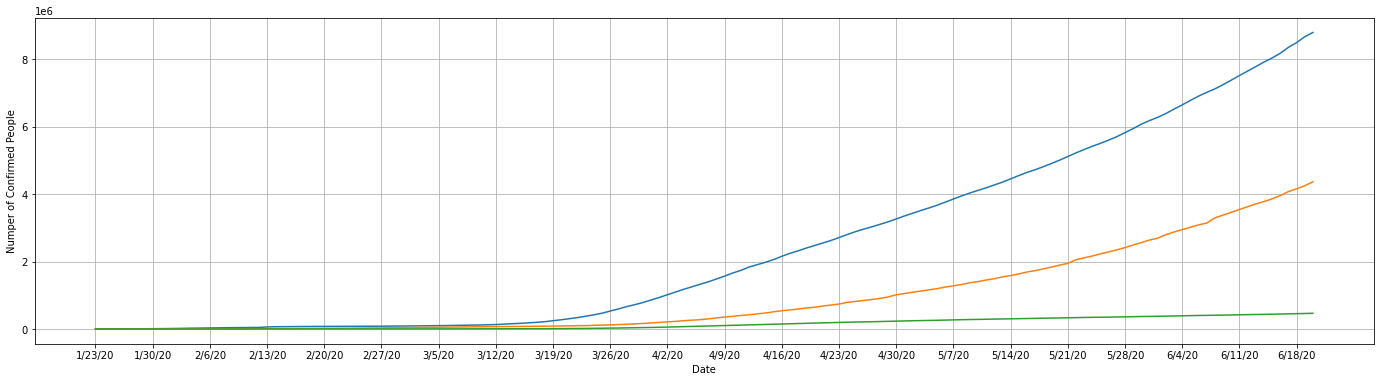

In [ ]:
#4번 인덱스 이후가 실질적 값이기 때문에, 전세계 적인 통계를 보기 위해 4이후로 자르고, 전체를 더해주어 plotting 하였다.
World_confirmed=confirmed.sum(axis = 0)
World_recovered=recovered.sum(axis = 0)
World_deaths=deaths.sum(axis = 0)
World_confirmed=World_confirmed[4:]
World_recovered=World_recovered[4:]
World_deaths=World_deaths[4:]
plt.figure(figsize=(24,6))
plt.plot(World_confirmed)
plt.plot(World_recovered)
plt.plot(World_deaths)
ax = plt.gca()
ax.set_xticks(ax.get_xticks()[::7]) #빼곡하면 보기 힘듦으로, 일주일 단위로 x축 라벨링
plt.xlabel('Date')
plt.ylabel('Numper of Confirmed People')
plt.grid(True)

In [ ]:
#향후 한달간의 변화를 예측하기 위해, P,Z값을 구하는 과정.

Confirmed_pmean=np.mean(World_confirmed)
Confirmed_pstd=np.std(World_confirmed)
Confirmed_z=(World_confirmed-Confirmed_pmean)/Confirmed_pstd

Recovered_pmean=np.mean(World_recovered)
Recovered_pstd=np.std(World_recovered)
Recovered_z=(World_recovered-Recovered_pmean)/Recovered_pstd

Deaths_pmean=np.mean(World_deaths)
Deaths_pstd=np.std(World_deaths)
Deaths_z=(World_deaths-Deaths_pmean)/Deaths_pstd

T=len(World_confirmed)

In [ ]:
#50일간의 data를 잘라주었다.

h=50
n=T-h
X_Confirmed=np.zeros((n,h+1))
y_Confirmed=np.zeros(n)
X_Recovered=np.zeros((n,h+1))
y_Recovered=np.zeros(n)
X_Deaths=np.zeros((n,h+1))
y_Deaths=np.zeros(n)
for i in range(n):
  X_Confirmed[i,:]=np.hstack((1,Confirmed_z[i:i+h]))
  y_Confirmed[i]=Confirmed_z[i+h]
  X_Recovered[i,:]=np.hstack((1,Recovered_z[i:i+h]))
  y_Recovered[i]=Recovered_z[i+h]
  X_Deaths[i,:]=np.hstack((1,Deaths_z[i:i+h]))
  y_Deaths[i]=Deaths_z[i+h]

In [ ]:
# 총 길이인 150일간의 데이터를 학습시키는 과정. Train 과 Valid값을 설정하였다
ntrain=150
nvalid=n-ntrain
x_Confirmed_train=X_Confirmed[:ntrain,:]
y_Confirmed_train=y_Confirmed[:ntrain]
x_Confirmed_valid=X_Confirmed[ntrain:,:]
y_Confirmed_valid=y_Confirmed[ntrain:]

x_Recovered_train=X_Recovered[:ntrain,:]
y_Recovered_train=y_Recovered[:ntrain]
x_Recovered_valid=X_Recovered[ntrain:,:]
y_Recovered_valid=y_Recovered[ntrain:]

x_Deaths_train=X_Deaths[:ntrain,:]
y_Deaths_train=y_Deaths[:ntrain]
x_Deaths_valid=X_Deaths[ntrain:,:]
y_Deaths_valid=y_Deaths[ntrain:]

theta_opt_Confirmed=np.linalg.lstsq(x_Confirmed_train,y_Confirmed_train,rcond=None)[0]
theta_opt_Recovered=np.linalg.lstsq(x_Recovered_train,y_Recovered_train,rcond=None)[0]
theta_opt_Deaths=np.linalg.lstsq(x_Deaths_train,y_Deaths_train,rcond=None)[0]

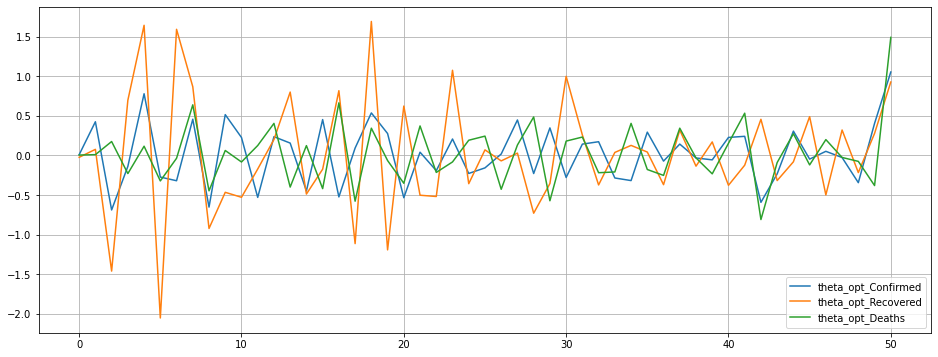

In [ ]:
#변화값인 세타값을 나타낸 그래프. 그림상 큰 편차를 나타내지만, 실질적 값은 작다.

plt.figure(figsize=(16,6))
plt.plot(theta_opt_Confirmed, label='theta_opt_Confirmed')
plt.plot(theta_opt_Recovered, label='theta_opt_Recovered')
plt.plot(theta_opt_Deaths, label='theta_opt_Deaths')
plt.legend()
plt.grid()
plt.show()

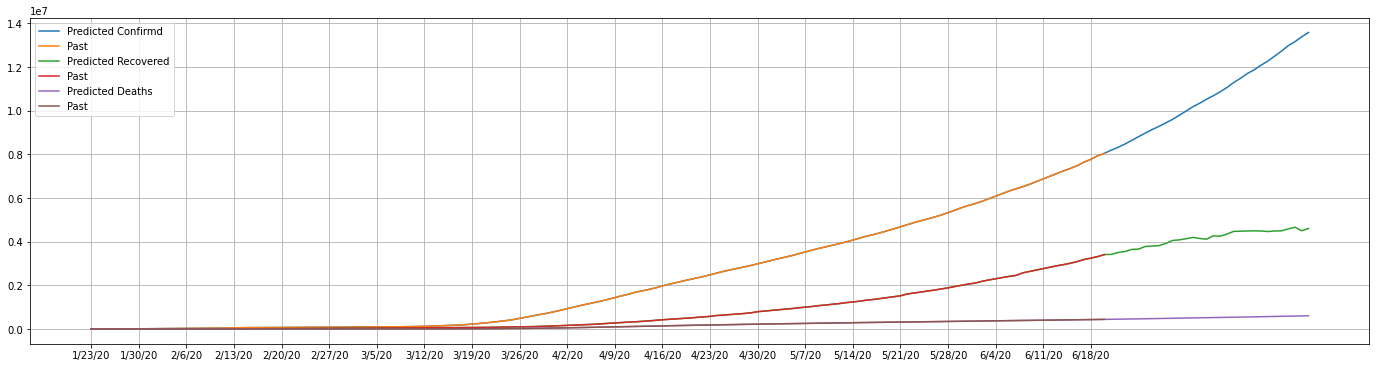

In [ ]:
#향후 한달간의 변화를 예측. 예측결과 앞으로 더욱 심해지는 양상을 보여준다. 
month=30
zpred_Confirmed=np.zeros(month)
zpred_Recovered=np.zeros(month)
zpred_Deaths=np.zeros(month)
for i in range(month):
  if i==0:
    x_Confirmed=np.hstack((1,Confirmed_z[-h+i:]))
    x_Recovered=np.hstack((1,Recovered_z[-h+i:]))
    x_Deaths=np.hstack((1,Deaths_z[-h+i:]))
  else:
    x_Confirmed=np.hstack((1,Confirmed_z[-h+i:],zpred_Confirmed[:i]))
    x_Recovered=np.hstack((1,Recovered_z[-h+i:],zpred_Recovered[:i]))
    x_Deaths=np.hstack((1,Deaths_z[-h+i:],zpred_Deaths[:i]))
  zpred_Confirmed[i]=np.dot(x_Confirmed,theta_opt_Confirmed)
  zpred_Recovered[i]=np.dot(x_Recovered,theta_opt_Recovered)
  zpred_Deaths[i]=np.dot(x_Deaths,theta_opt_Deaths)

plt.figure(figsize=(24,6))
plt.plot((np.hstack((Confirmed_z,zpred_Confirmed))-Confirmed_z[0])*Confirmed_pmean, label='Predicted Confirmd')
plt.plot((Confirmed_z-Confirmed_z[0])*Confirmed_pmean, label='Past')

plt.plot((np.hstack((Recovered_z,zpred_Recovered))-Recovered_z[0])*Recovered_pmean, label='Predicted Recovered')
plt.plot((Recovered_z-Recovered_z[0])*Recovered_pmean, label='Past')

plt.plot((np.hstack((Deaths_z,zpred_Deaths))-Deaths_z[0])*Deaths_pmean, label='Predicted Deaths')
plt.plot((Deaths_z-Deaths_z[0])*Deaths_pmean, label='Past')
ax = plt.gca()
ax.set_xticks(ax.get_xticks()[::7])
plt.legend()
plt.grid()
plt.show()

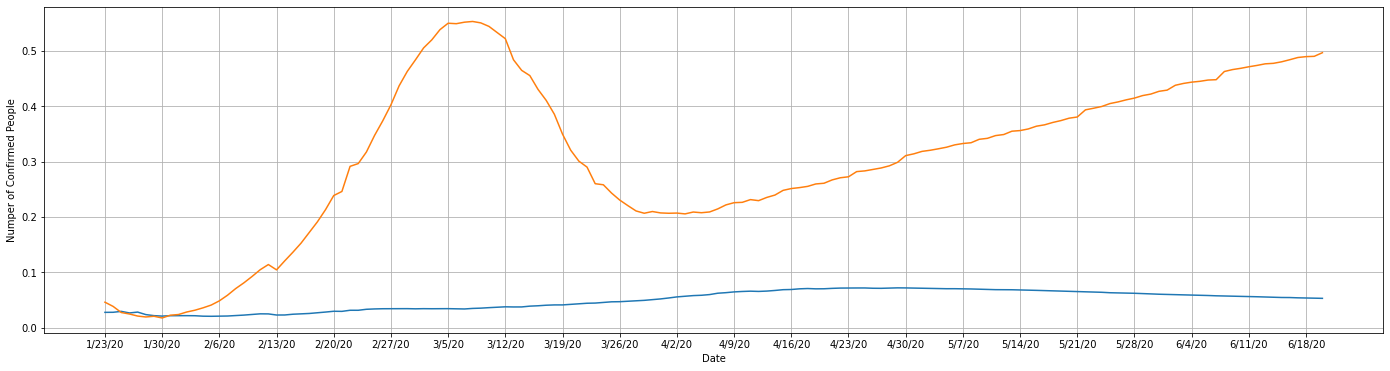

In [ ]:
#세계적 변화 추이중, 확진자 대비 회복 비율과 사망비율을 그래프로 그려보았다.

World_deathRate=World_deaths/World_confirmed
World_recoverRate=World_recovered/World_confirmed
plt.figure(figsize=(24,6))
plt.plot(World_deathRate)
plt.plot(World_recoverRate)
ax = plt.gca()
ax.set_xticks(ax.get_xticks()[::7])
plt.xlabel('Date')
plt.ylabel('Numper of Confirmed People')
plt.grid(True)

In [ ]:
#그래프 결과, 3/5/20부터 3/26/20까지 급격한 하락추세를 보임.
#이유를 밝히고자 해당 기간동안 확진자가 가장 많은 다섯나라를 pick해볼 계획

In [ ]:
#우선 현재(6월20일) 가장 확진자가 많은 5나라와 확진자가 적은 5나라를 pick

Confirmed_high_top5= confirmed.nlargest(5, '6/20/20')
Confirmed_low_top5 = confirmed.nsmallest(5, '6/20/20')
print(Confirmed_high_top5)
Confirmed_high_top5=Confirmed_high_top5['Country/Region'].tolist()
Confirmed_low_top5= Confirmed_low_top5['Country/Region'].tolist()
print("The top 5 Confirmed Country is",Confirmed_high_top5)
print("The low 5 Confirmed Country is",Confirmed_low_top5)

    Province/State  Country/Region      Lat  ...  6/18/20  6/19/20  6/20/20
225            NaN              US  37.0902  ...  2191052  2222579  2255119
28             NaN          Brazil -14.2350  ...   978142  1032913  1032913
187            NaN          Russia  60.0000  ...   560321   568292   576162
131            NaN           India  21.0000  ...   380532   395048   410451
223            NaN  United Kingdom  55.3781  ...   300469   301815   303110

[5 rows x 155 columns]
The top 5 Confirmed Country is ['US', 'Brazil', 'Russia', 'India', 'United Kingdom']
The low 5 Confirmed Country is ['Canada', 'China', 'France', 'United Kingdom', 'Lesotho']


In [ ]:
#사망자도 반복하여 pick, 미국과 브라질이 심각하다는 것을 알 수 있음.

Deaths_high_top5= deaths.nlargest(5, '6/20/20')
Deaths_low_top5 = deaths.nsmallest(5, '6/20/20')

Deaths_high_top5=Deaths_high_top5['Country/Region'].tolist()
Deaths_low_top5= Deaths_low_top5['Country/Region'].tolist()
print("The top 5 Deaths Country is",Deaths_high_top5)
print("The low 5 Deaths Country is",Deaths_low_top5)

The top 5 Deaths Country is ['US', 'Brazil', 'United Kingdom', 'Italy', 'France']
The low 5 Deaths Country is ['Australia', 'Bhutan', 'Cambodia', 'Canada', 'Canada']


In [ ]:
#우리가 원하는 해당 기간동안 가장 확진자가 높은 5나라를 pick

term=confirmed['3/26/20']-confirmed['3/5/20']
Term_high_top5= term.nlargest(5)
print(Term_high_top5)
print("The top 5 Confirmed Country in 3/5/20 ~ 3/26/20 is US, Italy, Spain, Germany, France")

#골라낸 결과, 미국과 유럽권이 가장 많았음.
#미국과 유럽에서의 확진자 증가로 인해, 회복자/확진자 의 비율이 크게 하락했다는 사실을 알 수 있게됨.

225    83906
137    76731
201    57527
120    43456
116    28778
dtype: int64
The top 5 Confirmed Country in 3/5/20 ~ 3/26/20 is US, Italy, Spain, Germany, France
